## Plot MAST Data Holdings and Distribution vs. Time.
The Data can be found in a box folder: https://stsci.app.box.com/folder/23105923694
holdings.xlsx and ingest_dist-through Feb2000-Feb2018.xlsx
This reads the data directly from the excel spreadsheet and plots it.

In [133]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt

def basicHoldingsPlot(holddf,plotnames,totalHoldings, units=1024, title=''):
    """
    Create the basic plot of the Holdings.
    totalHoldings = [0,0] if you don't want that plotted.
    """
    tH=totalHoldings/units
    df=holddf[plotnames]
        
    for c in plotnames:            
        plt.plot(holddf.Date,df[c]/units,'-',linewidth=2,label=c)

    try:
        plt.plot(holddf.Date,tH,'k-',linewidth=3,label='Total')
    except (ValueError,TypeError):
        pass
    plt.legend(framealpha=.9)
    plt.xlabel('Year',fontsize=14)
    
    if units==1024:
        plt.ylabel('MAST Holdings (Tb)',fontsize=14)
    else:
        plt.ylabel('MAST Holdings (Gb)',fontsize=14)

    plt.title(title,fontsize=15)
    plt.tick_params(top='on',right='on',direction='in')



Read in the holdings File to a pandas DataFrame and create some plots.

In [134]:
#Plot Holdings
hold_filename="/Users/smullally/Desktop/MASTData/holdings.xlsx"

#You can change the the names, but don't change the order.
#Note, the dates are represented as the first day of the month
colnames=["HST","GSC_I&II", "DSS","IUE","FUSE","VLA_FIRST","GALEX", "EUVE",\
          "Legacy", "XMM_OM","EPOCH","HLSP","Kepler/K2","HLA", "JWST_SI&T",\
          "SWIFTUVOT","PANSTARRS","SumPart","Date"]

units=1024  #Put 1024 if you want in Tb, or 1 if want in Gb

useCol=np.arange(0,19,1)

holddf=p.read_excel(hold_filename,sheet=0,skiprows=np.arange(0,25,1),\
                    names=colnames,usecols=useCol)

totalHoldings=holddf[colnames[0:17]].sum(axis=1)
holddf['Total'] = totalHoldings
mostHoldings=holddf[colnames[0:16]].sum(axis=1)
holddf['TotalNoPAN'] = mostHoldings
times=holddf.Date
holddf.set_index('Date',inplace=True,drop=False)


In [135]:
#Sort holdings based on February 2018 so you can pick just the largest or smallest ones.
sizes=holddf[colnames][holddf.Date=='2018-02-01'].as_matrix()
ind=np.argsort(sizes[0][0:17])
sortnames=list(map(lambda x: colnames[x], ind))
sortsizes=list(map(lambda x: sizes[0][x], ind))
print("Sorted from small to large of the MAST holdings.")
print(sortnames)

Sorted from small to large of the MAST holdings.
['XMM_OM', 'EPOCH', 'Legacy', 'EUVE', 'VLA_FIRST', 'IUE', 'FUSE', 'GSC_I&II', 'SWIFTUVOT', 'DSS', 'Kepler/K2', 'HLSP', 'GALEX', 'HST', 'JWST_SI&T', 'HLA', 'PANSTARRS']


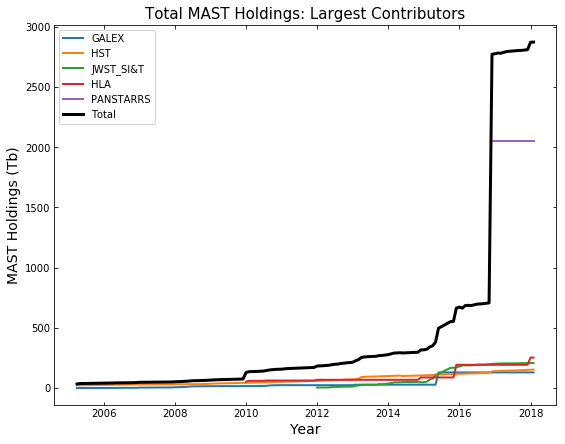

In [136]:
plt.figure(figsize=(9,7))
plotnames=sortnames[-5:]
Title="Total MAST Holdings: Largest Contributors"
basicHoldingsPlot(holddf,plotnames, holddf['Total'],units=units,title=Title)
plt.show()

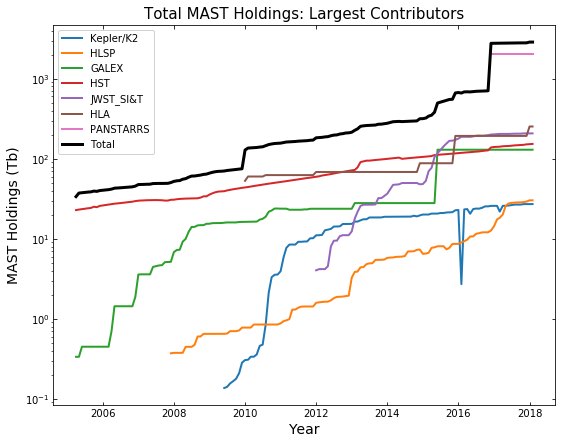

In [137]:
plt.figure(figsize=(9,7))
plotnames=sortnames[-7:]
basicHoldingsPlot(holddf,plotnames, holddf['Total'],units=units,title=Title)
plt.gca().set_yscale("log")
plt.show()
#Note I think there is an error in the Kepler Holdings on one day..check with Karen.

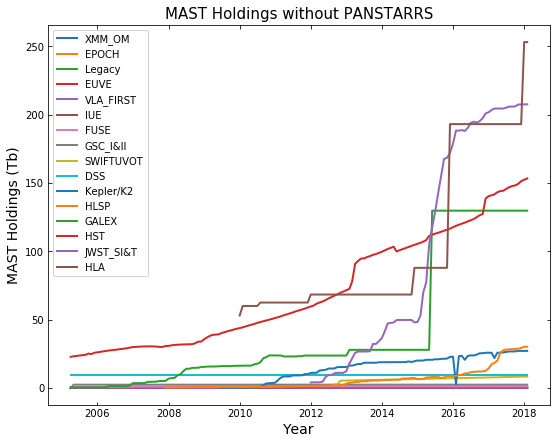

In [138]:
#Plot All without PanStars
plotnames=sortnames[0:16]   
plt.figure(figsize=(9,7))
basicHoldingsPlot(holddf,plotnames,np.array([0,0]),units=units,\
                  title='MAST Holdings without PANSTARRS')
plt.show()

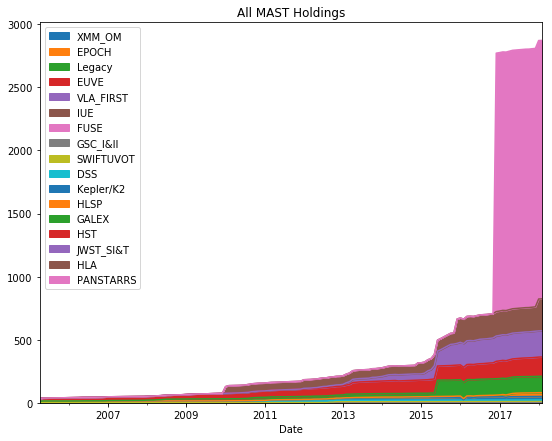

In [139]:
#plot area plot
plotnames=sortnames[0:17]
(holddf[plotnames]/units).plot.area(figsize=(9,7))
plt.title("All MAST Holdings")
plt.show()

## Now Let's read in the Distribution File and plot that.

In [140]:
#Explore the MAST Distribution Volumes.
#
dist_filename="/Users/smullally/Desktop/MASTData/ingest_dist-Feb2000Feb2018.xlsx"
distdf=p.read_excel(dist_filename,sheet=0)
distdf.rename(columns={"Distribution.1":"DistTb","Ingest.1":"IngestTb"},inplace=True)

In [141]:
#Sort by 2018's largest distributions
sizes=distdf[distdf.columns[0:-8]].loc['2018-02-01'].as_matrix()
ind=np.argsort(sizes)
dsortnames=list(map(lambda x: distdf.columns[x], ind))
dsortsizes=list(map(lambda x: sizes[x], ind))
print("Sorted Distribution list")
print(dsortnames)

Sorted Distribution list
['rg_hpol', 'rg_fuse_online', 'rg_hut', 'rg_uit', 'rg_wuppe', 'rg_befs', 'rg_tues', 'rg_kepler_mast_prop', 'rg_hstonline', 'rg_epoch', 'rg_xmm', 'rg_vlaf', 'rg_copernicus', 'rg_euve', 'rg_iue', 'rg_imaps', 'rg_swiftuvot', 'rg_fuse', 'rg_k2', 'rg_hst_portal', 'rg_dss', 'rg_galex', 'rg_k2_mast', 'rg_kepler', 'rg_panstarrs_images', 'rg_hlsp', 'rg_kepler_mast_pub', 'rg_hst', 'rg_hla']


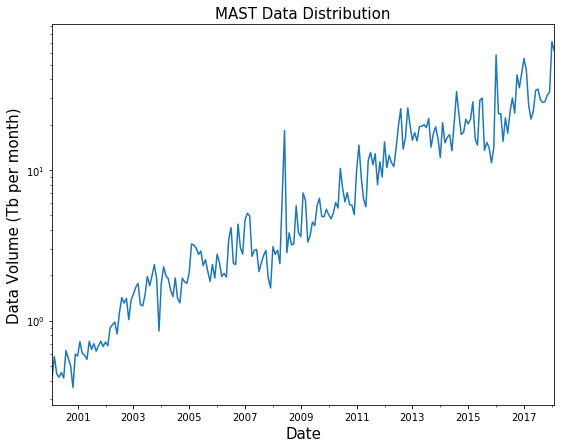

In [149]:
#Simple plot of distribution each month
plt.figure(figsize=(9,7))
distdf['DistTb'].plot()
plt.ylabel('Data Volume (Tb per month)',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.gca().set_yscale("log")
plt.title('MAST Data Distribution',fontsize=15)
plt.show()

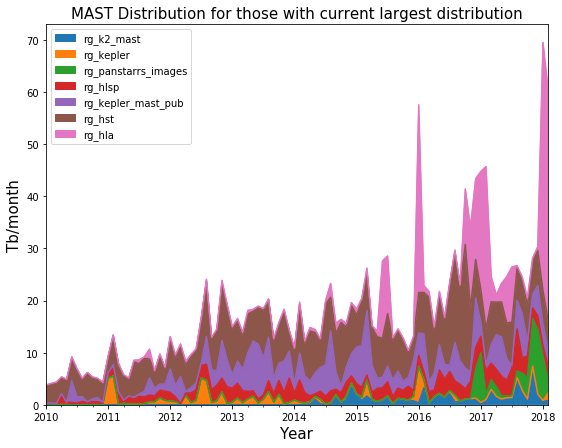

In [148]:
#Choose which columns to plot with plotnames. dsortnames is sorted by distrubtion size in 2018
plotnames=dsortnames[-7:]
(distdf[plotnames]/1024).plot.area(figsize=(9,7))
plt.ylabel('Tb/month',fontsize=15)
plt.xlabel('Year',fontsize=15)
t1 = p.to_datetime('2010-01-01')
t2 = p.to_datetime('2018-02-01')
plt.xlim(t1,t2)
plt.title("MAST Distribution for those with current largest distribution",fontsize=15)
plt.show()

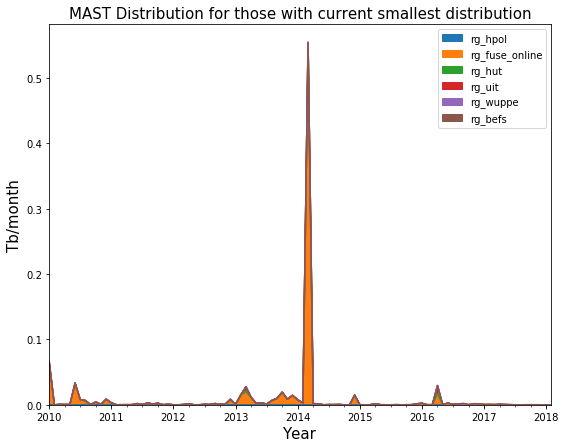

In [144]:
plotnames=dsortnames[0:6]
(distdf[plotnames]/1024).plot.area(figsize=(9,7))
plt.ylabel('Tb/month',fontsize=15)
plt.xlabel('Year',fontsize=15)
t1 = p.to_datetime('2010-01-01')
t2 = p.to_datetime('2018-02-01')
plt.xlim(t1,t2)
plt.title("MAST Distribution for those with current smallest distribution",fontsize=15)
plt.show()

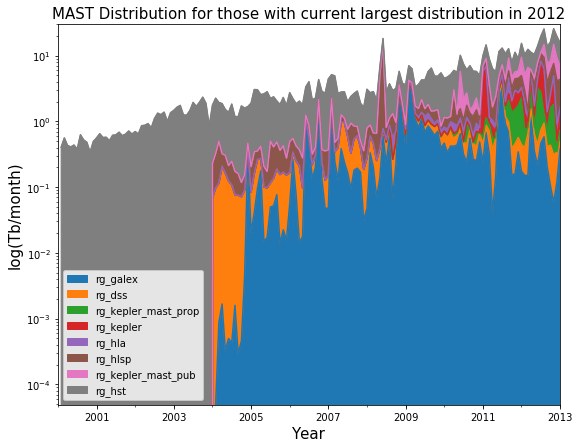

In [145]:
#The Early Years
sizes=distdf[distdf.columns[0:-8]].loc['2012-02-01'].as_matrix()
ind=np.argsort(sizes)
adsortnames=list(map(lambda x: distdf.columns[x], ind))
adsortsizes=list(map(lambda x: sizes[x], ind))
plotnames=adsortnames[-8:]  #Largest distribution in early 2012
(distdf[plotnames]/1024).plot.area(figsize=(9,7),stacked=True)
plt.gca().set_yscale("log")
plt.ylabel('log(Tb/month)',fontsize=15)
plt.xlabel('Year',fontsize=15)
t1 = p.to_datetime('2000-01-01')
t2 = p.to_datetime('2013-01-01')
plt.xlim(t1,t2)
plt.ylim(0,30)
plt.title("MAST Distribution for those with current largest distribution in 2012",fontsize=15)
plt.show()

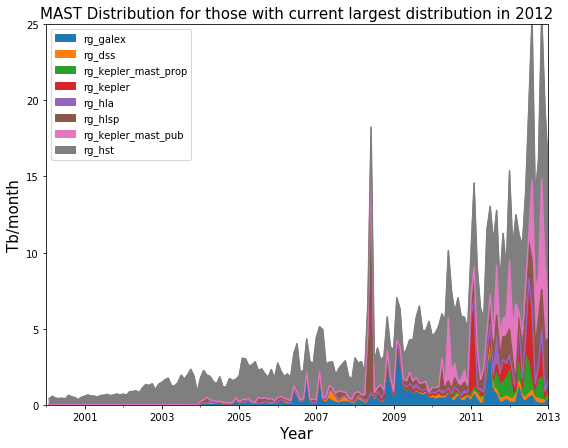

In [110]:
#Without the Log scale
plotnames=adsortnames[-8:]  #Largest distribution in early 2012
(distdf[plotnames]/1024).plot.area(figsize=(9,7),stacked=True)
plt.ylabel('Tb/month',fontsize=15)
plt.xlabel('Year',fontsize=15)
t1 = p.to_datetime('2000-01-01')
t2 = p.to_datetime('2013-01-01')
plt.xlim(t1,t2)
plt.ylim(0,25)
plt.title("MAST Distribution for those with current largest distribution in 2012",fontsize=15)
plt.show()